In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BRAZIL_CITIES.csv', sep=';', encoding='utf-8')

df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


# NaN removal

Shape: (5573, 81)


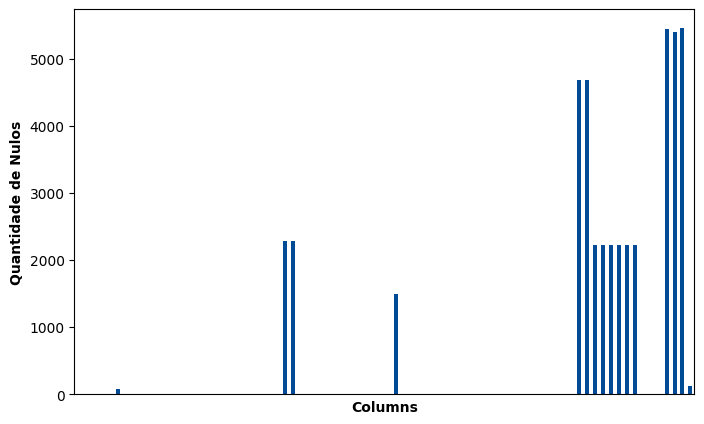

In [21]:
# Count NaN
pd.set_option('display.max_rows', None)

print("Shape:", df.shape)

nans = df.isnull().sum()
nans = nans[nans > 0]

fig = plt.figure(figsize=(8, 5))
nans.plot(kind='bar', color="#004B95")

# Hide x ticks
plt.xlabel('Colunas', fontweight='bold')
plt.ylabel('Quantidade de Nulos', fontweight='bold')
plt.xticks([])
plt.show()

## Enssential columns

In [439]:
IBGE_columns = df.filter(regex='IBGE').columns
IDHM_columns = df.filter(regex='IDHM').columns

df.dropna(subset=IBGE_columns, inplace=True)
df.dropna(subset=IDHM_columns, inplace=True)
df.dropna(subset=['LONG', 'LAT', 'ALT', 'AREA'], inplace=True)

In [440]:
print("Shape: ", df.shape)
df.isnull().sum()

Shape:  (5489, 81)


CITY                         0
STATE                        0
CAPITAL                      0
IBGE_RES_POP                 0
IBGE_RES_POP_BRAS            0
IBGE_RES_POP_ESTR            0
IBGE_DU                      0
IBGE_DU_URBAN                0
IBGE_DU_RURAL                0
IBGE_POP                     0
IBGE_1                       0
IBGE_1-4                     0
IBGE_5-9                     0
IBGE_10-14                   0
IBGE_15-59                   0
IBGE_60+                     0
IBGE_PLANTED_AREA            0
IBGE_CROP_PRODUCTION_$       0
IDHM Ranking 2010            0
IDHM                         0
IDHM_Renda                   0
IDHM_Longevidade             0
IDHM_Educacao                0
LONG                         0
LAT                          0
ALT                          0
PAY_TV                       0
FIXED_PHONES                 0
AREA                         0
REGIAO_TUR                2278
CATEGORIA_TUR             2278
ESTIMATED_POP                0
RURAL_UR

## Columns to fill values

### Mun Expendit fill with KNN regressor

In [441]:
# Copy of rows with MUN_EXPENDIT == NaN
expendit_nan = df[df['MUN_EXPENDIT'].isnull()].copy()
expendit_nan.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
5,Abaiara,CE,0,10496.0,10496.0,0.0,2791.0,1251.0,1540.0,4538.0,...,NaN,NaN,NaN,553.0,1674.0,0.0,NaN,NaN,NaN,1.0
6,Abaíra,BA,0,8316.0,8316.0,0.0,2572.0,1193.0,1379.0,3725.0,...,NaN,NaN,NaN,896.0,696.0,0.0,NaN,NaN,NaN,1.0
7,Abaré,BA,0,17064.0,17064.0,0.0,4332.0,2379.0,1953.0,8994.0,...,0.0,21823314.0,0.0,613.0,1532.0,0.0,NaN,NaN,NaN,1.0


In [442]:
# Dataframe with LONG, LAT, IBGE_RES_POP, MUN_EXPENDIT
mun_expendit_analysis = df[['LONG', 'LAT', 'IBGE_RES_POP', 'MUN_EXPENDIT']].copy()
mun_expendit_analysis.isnull().sum()

# Drop NaN
mun_expendit_analysis.dropna(inplace=True)

target = mun_expendit_analysis['MUN_EXPENDIT']
features = mun_expendit_analysis.drop('MUN_EXPENDIT', axis=1)

In [443]:
# Cross validation knn regressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
scores = cross_val_score(knn, features, target, cv=15)
print("KNN score:", scores.mean())


# Cross validation linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr, features, target, cv=15)
print("LR score:", scores.mean())

KNN score: 0.7628376559477703
LR score: 0.5375913701185967


In [444]:
# Predict MUN_EXPENDIT for rows with NaN
knn.fit(features, target)
expendit_nan['MUN_EXPENDIT'] = knn.predict(expendit_nan[['LONG', 'LAT', 'IBGE_RES_POP']])

# Update NaN rows
df.update(expendit_nan)

df['MUN_EXPENDIT'].hasnans

False

### Turistic columns

In [448]:
# Unique values of CATEGORIA_TUR
df['CATEGORIA_TUR'].unique()

array([nan, 'D', 'C', 'E', 'B', 'A'], dtype=object)

In [449]:
# Fill NaN with 'NENHUM'
df.fillna({'CATEGORIA_TUR': 'NENHUM'}, inplace=True)

# Unique values of CATEGORIA_TUR
df['CATEGORIA_TUR'].unique()

array(['NENHUM', 'D', 'C', 'E', 'B', 'A'], dtype=object)

In [450]:
# Drop REGIAO_TUR as it's just the name, not relevant for the analysis
df.drop('REGIAO_TUR', axis=1, inplace=True)

### Zero it!

In [445]:
df.isnull().sum()

CITY                         0
STATE                        0
CAPITAL                      0
IBGE_RES_POP                 0
IBGE_RES_POP_BRAS            0
IBGE_RES_POP_ESTR            0
IBGE_DU                      0
IBGE_DU_URBAN                0
IBGE_DU_RURAL                0
IBGE_POP                     0
IBGE_1                       0
IBGE_1-4                     0
IBGE_5-9                     0
IBGE_10-14                   0
IBGE_15-59                   0
IBGE_60+                     0
IBGE_PLANTED_AREA            0
IBGE_CROP_PRODUCTION_$       0
IDHM Ranking 2010            0
IDHM                         0
IDHM_Renda                   0
IDHM_Longevidade             0
IDHM_Educacao                0
LONG                         0
LAT                          0
ALT                          0
PAY_TV                       0
FIXED_PHONES                 0
AREA                         0
REGIAO_TUR                2278
CATEGORIA_TUR             2278
ESTIMATED_POP                0
RURAL_UR

In [446]:
# Fill with 0, because it probably means that the city has none of that feature

for column in df.columns:
    if df[column].dtype == 'float64':
        df.fillna({column: 0}, inplace=True)

In [447]:
df.isnull().sum()

CITY                         0
STATE                        0
CAPITAL                      0
IBGE_RES_POP                 0
IBGE_RES_POP_BRAS            0
IBGE_RES_POP_ESTR            0
IBGE_DU                      0
IBGE_DU_URBAN                0
IBGE_DU_RURAL                0
IBGE_POP                     0
IBGE_1                       0
IBGE_1-4                     0
IBGE_5-9                     0
IBGE_10-14                   0
IBGE_15-59                   0
IBGE_60+                     0
IBGE_PLANTED_AREA            0
IBGE_CROP_PRODUCTION_$       0
IDHM Ranking 2010            0
IDHM                         0
IDHM_Renda                   0
IDHM_Longevidade             0
IDHM_Educacao                0
LONG                         0
LAT                          0
ALT                          0
PAY_TV                       0
FIXED_PHONES                 0
AREA                         0
REGIAO_TUR                2278
CATEGORIA_TUR             2278
ESTIMATED_POP                0
RURAL_UR

In [451]:
# Check if there are any NaN
print(df.isnull().sum().sum() == 0)

True


# Features Analysis

## IDHM columns

Removal required by Amanda:
 
>A variável alvo será IDHM. Os outros atributos com prefixo IDHM são muito correlacionados com o atributo alvo, portanto devem ser eliminados para que o desafio fique mais estimulante. Ex: IDHM_Ranking_2010, IDHM_Renda...

In [452]:
# Drop columns that starts with IDHM
IDHM_columns = df.filter(regex='IDHM').columns
IDHM_columns

Index(['IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao'],
      dtype='object')

In [453]:
IDHM_columns = IDHM_columns.delete(1)
df.drop(columns=IDHM_columns, inplace=True)

## Categorical data

### Name and State

The name of the *CITY* and the *STATE* are not relevant. The location is already being tracked with *LONG*, *LAT* and *ALT* values.

In [454]:
df.drop(columns=['CITY', 'STATE'], axis=1, inplace=True)

### GVA_MAIN

In [455]:
df['GVA_MAIN'].unique()

array(['Demais serviços',
       'Administração, defesa, educação e saúde públicas e seguridade social',
       'Agricultura, inclusive apoio à agricultura e a pós colheita',
       'Indústrias de transformação',
       'Pecuária, inclusive apoio à pecuária',
       'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
       'Comércio e reparação de veículos automotores e motocicletas',
       'Indústrias extrativas', 'Construção',
       'Produção florestal, pesca e aquicultura'], dtype=object)

The *GVA_MAIN* column says which are the main economic activities of the city, but doesn't contain the GVA value.

>Gross value added (GVA) is an economic productivity metric that measures the contribution of a corporate subsidiary, company, or municipality to an economy, producer, sector, or region

If we can't quantify this contribuition it's not that usefull

In [456]:
df.drop('GVA_MAIN', axis=1, inplace=True)

### Tipology

In [457]:
df['RURAL_URBAN'].unique()

array(['Urbano', 'Rural Adjacente', 'Rural Remoto',
       'Intermediário Adjacente', 'Intermediário Remoto'], dtype=object)

In [458]:
# Get dummies to RURAL_URBAN
df = pd.get_dummies(df, columns=['RURAL_URBAN'])
df.head()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,RURAL_URBAN_Intermediário Adjacente,RURAL_URBAN_Intermediário Remoto,RURAL_URBAN_Rural Adjacente,RURAL_URBAN_Rural Remoto,RURAL_URBAN_Urbano
0,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,...,0.0,0.0,0.0,0.0,1.0,False,False,False,False,True
1,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,...,0.0,0.0,0.0,0.0,1.0,False,False,True,False,False
2,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,...,0.0,0.0,0.0,0.0,3.0,False,False,True,False,False
3,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,...,0.0,0.0,0.0,0.0,4.0,False,False,False,False,True
4,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,...,0.0,0.0,0.0,0.0,2.0,False,False,False,False,True


### Turism

In [459]:
# Get dummies to CATEGORIA_TUR
df = pd.get_dummies(df, columns=['CATEGORIA_TUR'])
df.head()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,RURAL_URBAN_Intermediário Remoto,RURAL_URBAN_Rural Adjacente,RURAL_URBAN_Rural Remoto,RURAL_URBAN_Urbano,CATEGORIA_TUR_A,CATEGORIA_TUR_B,CATEGORIA_TUR_C,CATEGORIA_TUR_D,CATEGORIA_TUR_E,CATEGORIA_TUR_NENHUM
0,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,...,False,False,False,True,False,False,False,False,False,True
1,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,...,False,True,False,False,False,False,False,True,False,False
2,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,...,False,True,False,False,False,False,True,False,False,False
3,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,...,False,False,False,True,False,False,False,True,False,False
4,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,...,False,False,False,True,False,False,False,True,False,False


### Area type correction

In [460]:
# Remove "," from AREA values
df['AREA'] = df['AREA'].str.replace(',', '').astype(float)
df['AREA'].dtype

dtype('float64')

## Dimensionality reduction

### PCA

In [461]:
'''# PCA to unify all COMP_X columns
from sklearn.decomposition import PCA

COMP_columns = df.filter(regex='COMP').columns
RURAL_URBAN_columns = df.filter(regex='RURAL_URBAN').columns
CATEGORIA_TUR_columns = df.filter(regex='CATEGORIA_TUR').columns

pca = PCA(n_components=1)
df['COMP'] = pca.fit_transform(df[COMP_columns])
df['RURAL_URBAN'] = pca.fit_transform(df[RURAL_URBAN_columns])
df['CATEGORIA_TUR'] = pca.fit_transform(df[CATEGORIA_TUR_columns])

df.drop(columns=COMP_columns, inplace=True)
df.drop(columns=RURAL_URBAN_columns, inplace=True)
df.drop(columns=CATEGORIA_TUR_columns, inplace=True)'''

"# PCA to unify all COMP_X columns\nfrom sklearn.decomposition import PCA\n\nCOMP_columns = df.filter(regex='COMP').columns\nRURAL_URBAN_columns = df.filter(regex='RURAL_URBAN').columns\nCATEGORIA_TUR_columns = df.filter(regex='CATEGORIA_TUR').columns\n\npca = PCA(n_components=1)\ndf['COMP'] = pca.fit_transform(df[COMP_columns])\ndf['RURAL_URBAN'] = pca.fit_transform(df[RURAL_URBAN_columns])\ndf['CATEGORIA_TUR'] = pca.fit_transform(df[CATEGORIA_TUR_columns])\n\ndf.drop(columns=COMP_columns, inplace=True)\ndf.drop(columns=RURAL_URBAN_columns, inplace=True)\ndf.drop(columns=CATEGORIA_TUR_columns, inplace=True)"

In [462]:
df.columns

Index(['CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', 'IBGE_RES_POP_ESTR',
       'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_POP', 'IBGE_1',
       'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14', 'IBGE_15-59', 'IBGE_60+',
       'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 'IDHM', 'LONG', 'LAT',
       'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA', 'ESTIMATED_POP', 'GVA_AGROPEC',
       'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC', ' GVA_TOTAL ', 'TAXES',
       'GDP', 'POP_GDP', 'GDP_CAPITA', 'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A',
       'COMP_B', 'COMP_C', 'COMP_D', 'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H',
       'COMP_I', 'COMP_J', 'COMP_K', 'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O',
       'COMP_P', 'COMP_Q', 'COMP_R', 'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS',
       'BEDS', 'Pr_Agencies', 'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_Assets',
       'Pu_Assets', 'Cars', 'Motorcycles', 'Wheeled_tractor', 'UBER', 'MAC',
       'WAL-MART', 'POST_OFFICES', 'RURAL_URBAN_Intermediário Adjacente',
      

### High correlation between features

In [463]:
# Count columns
print("Columns:", len(df.columns))

Columns: 82


<Axes: >

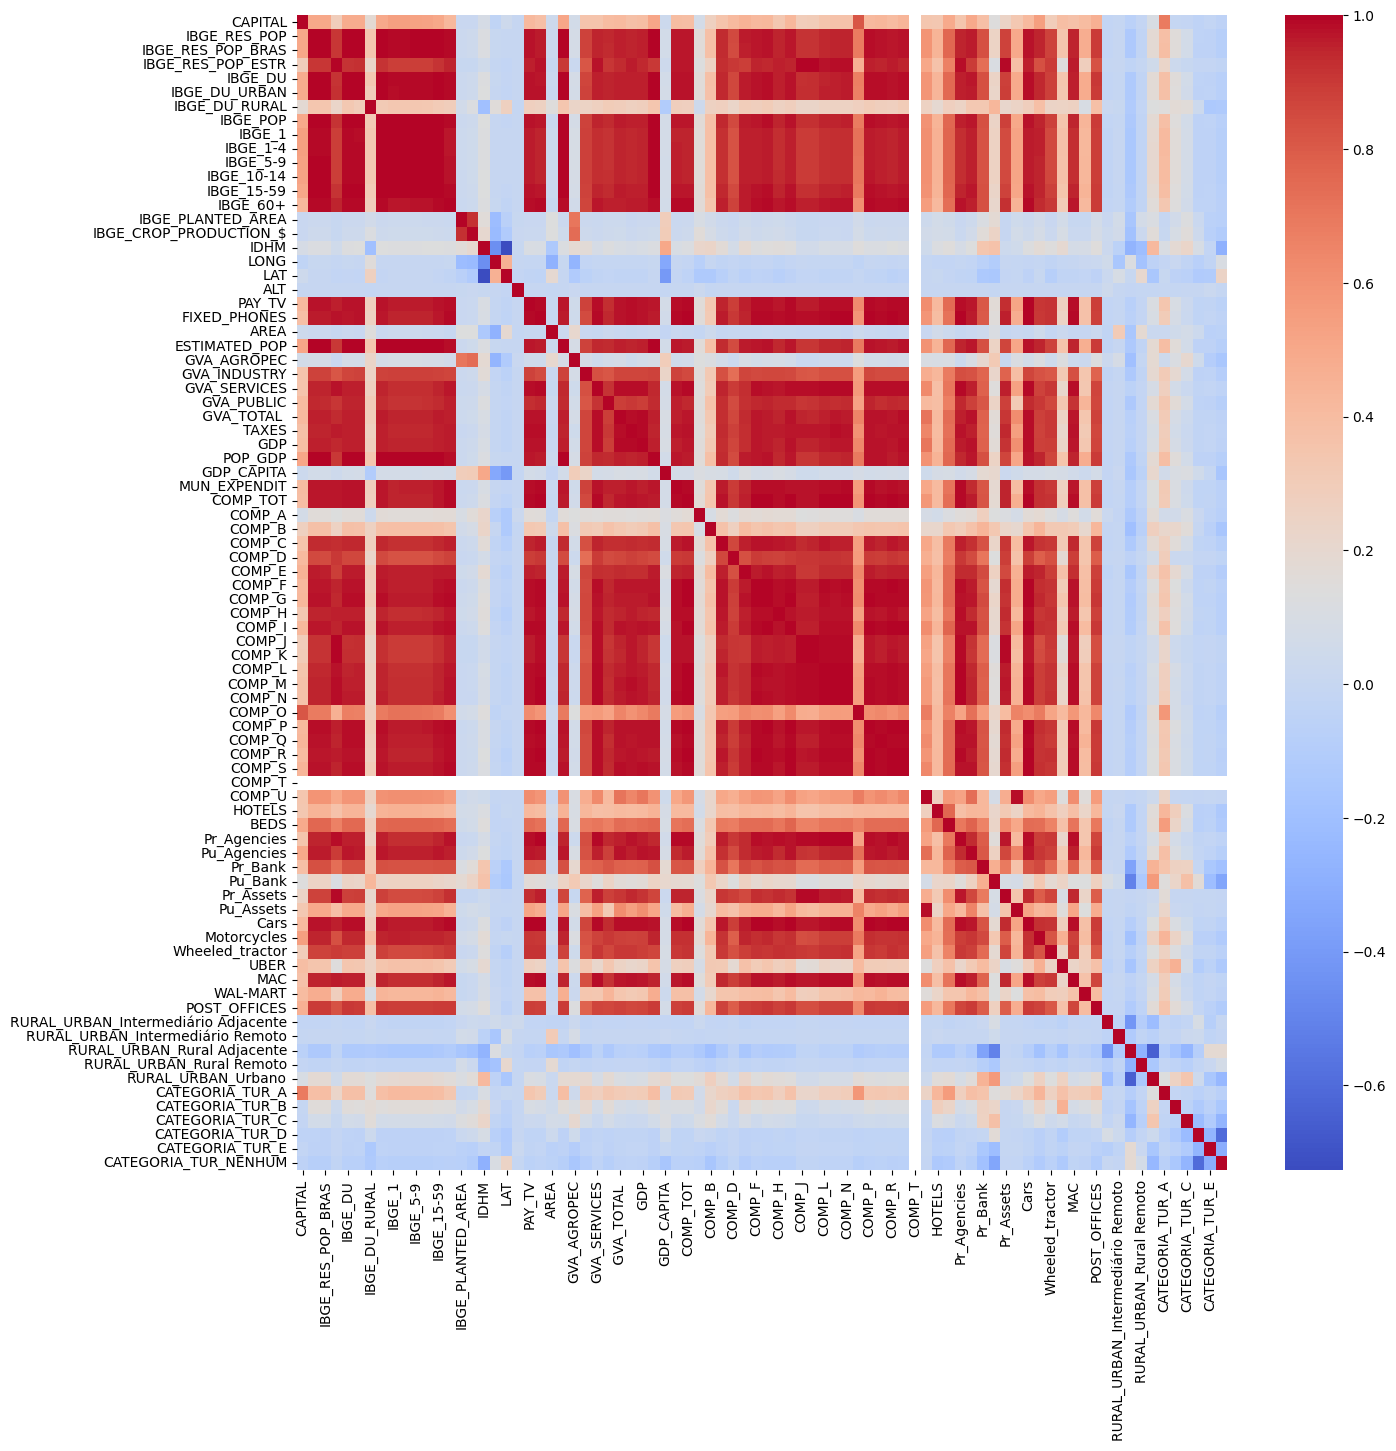

In [464]:
import seaborn as sns

correlation = df.corr()
fig = plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=False, cmap='coolwarm')

In [465]:
import numpy as np

# Drop columns with correlation > 0.95
correlation = correlation.abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df.drop(columns=to_drop, inplace=True)

In [466]:
print("Columns:", len(df.columns))

Columns: 39


<Axes: >

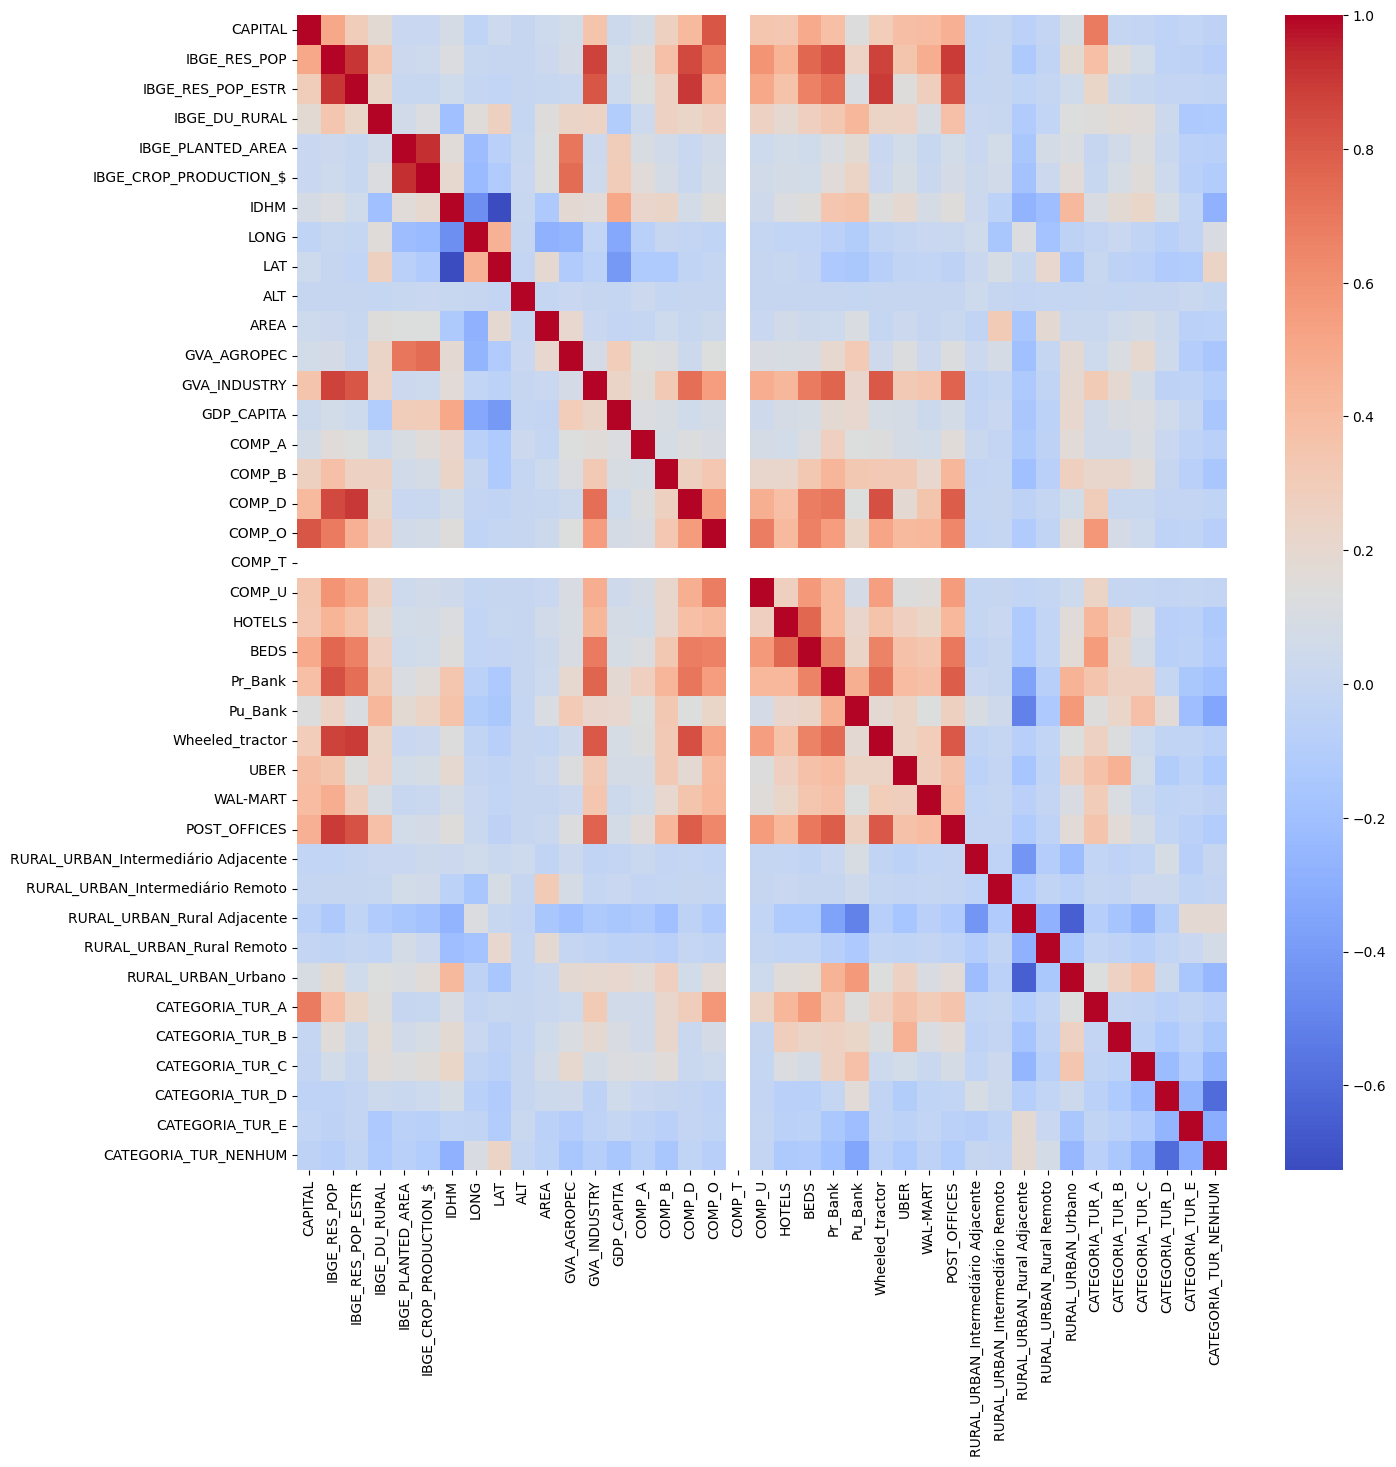

In [467]:
correlation = df.corr()
fig = plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=False, cmap='coolwarm')

### Low correlation with target

Columns: 35


<Axes: >

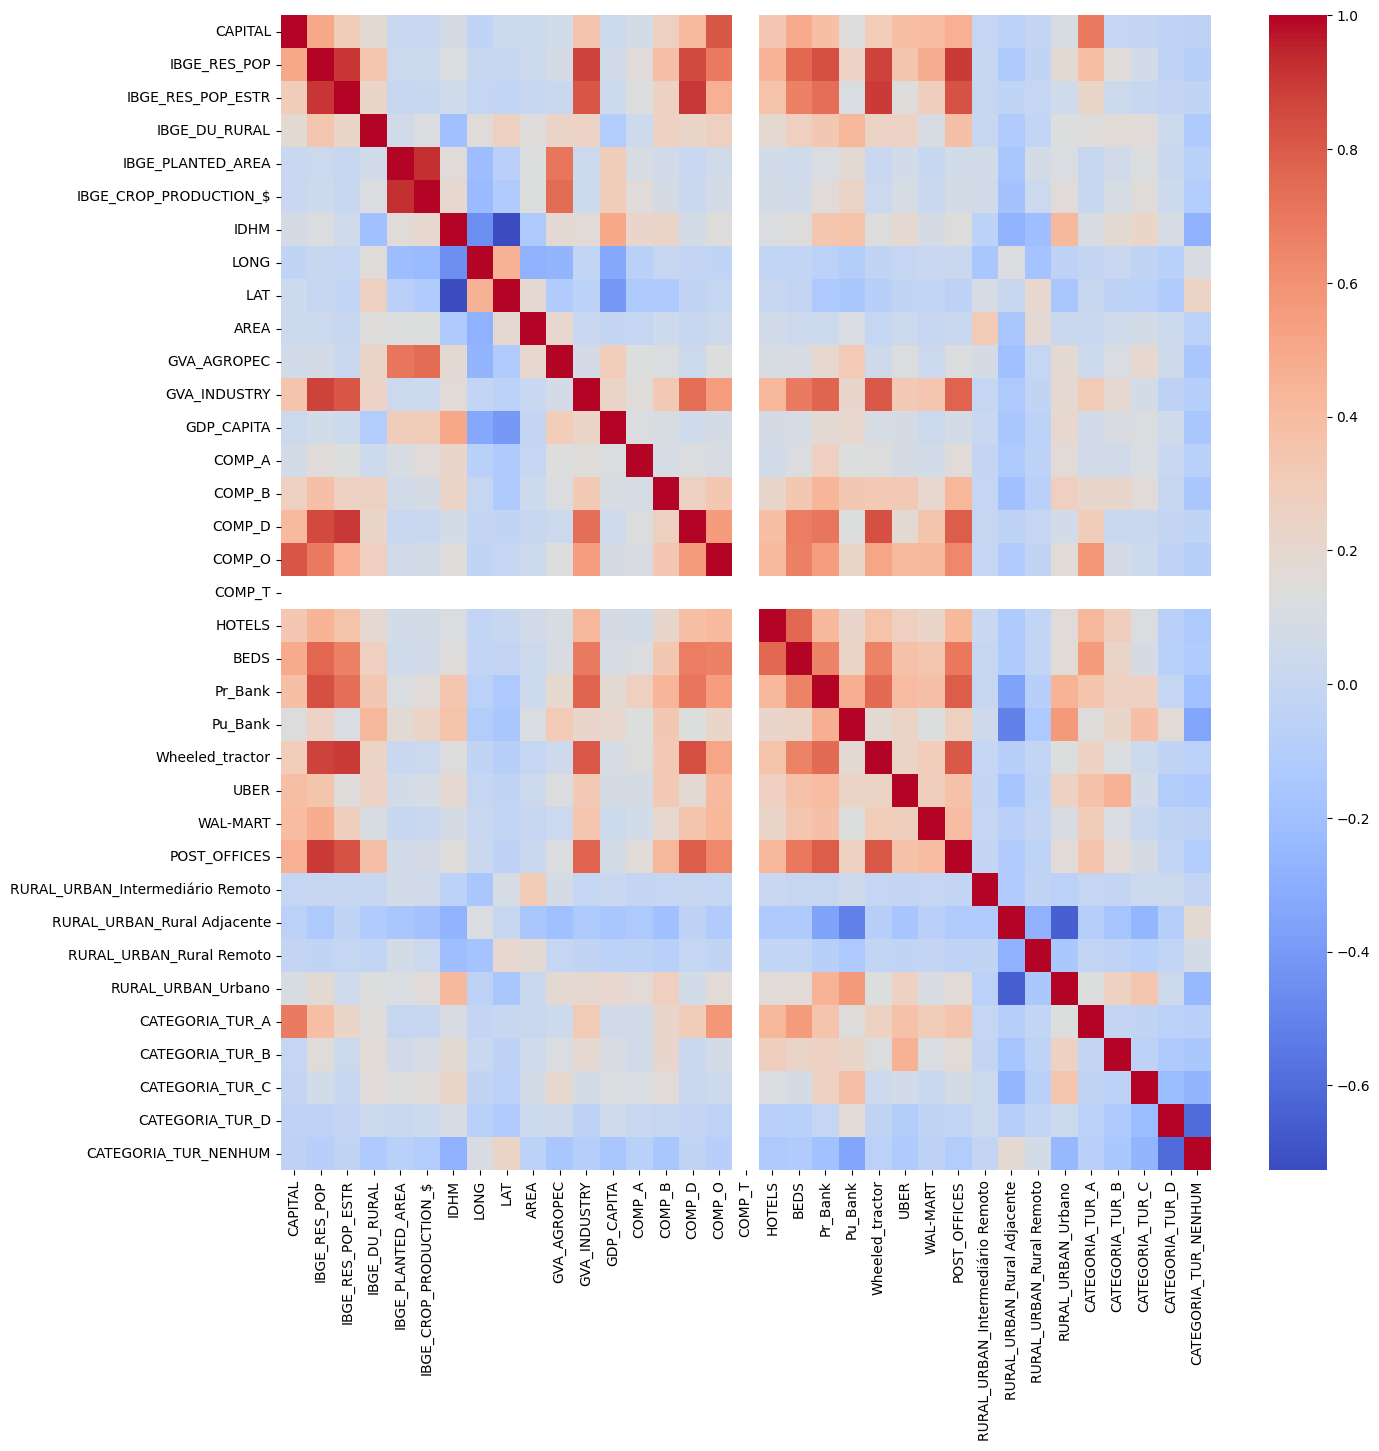

In [468]:
# Drop columns with correlation < 0.05 with IDHM
correlation = df.corr()

to_drop = correlation['IDHM'].abs()[correlation['IDHM'].abs() < 0.05].index
df.drop(columns=to_drop, inplace=True)

print("Columns:", len(df.columns))

correlation = df.corr()
fig = plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=False, cmap='coolwarm')

# Normalization

In [469]:
# Normalize data exxcpt for IDHM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = df.columns
columns = columns.drop('IDHM')
df[columns] = scaler.fit_transform(df[columns])

df.head()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_RURAL,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM,LONG,LAT,AREA,...,POST_OFFICES,RURAL_URBAN_Intermediário Remoto,RURAL_URBAN_Rural Adjacente,RURAL_URBAN_Rural Remoto,RURAL_URBAN_Urbano,CATEGORIA_TUR_A,CATEGORIA_TUR_B,CATEGORIA_TUR_C,CATEGORIA_TUR_D,CATEGORIA_TUR_NENHUM
0,-0.057359,-0.130307,-0.034666,-0.514577,-0.316702,-0.377431,0.708,-0.498297,-0.042972,-0.247349,...,-0.250343,-0.105127,-1.112095,-0.248399,1.713940,-0.083494,-0.172157,-0.316576,-0.718539,1.187253
1,-0.057359,-0.131294,-0.034666,-0.363484,-0.222874,-0.268925,0.690,-0.179661,-0.251898,-0.116205,...,-0.250343,-0.105127,0.899203,-0.248399,-0.583451,-0.083494,-0.172157,-0.316576,1.391713,-0.842280
2,-0.057359,-0.079332,0.056010,-0.024113,-0.091425,-0.167839,0.690,-0.385771,0.026657,-0.086883,...,0.275339,-0.105127,0.899203,-0.248399,-0.583451,-0.083494,-0.172157,3.158797,-0.718539,-0.842280
3,-0.057359,-0.039537,-0.034666,-0.257246,-0.281900,-0.339467,0.698,0.124463,-0.332662,0.051077,...,0.538179,-0.105127,-1.112095,-0.248399,1.713940,-0.083494,-0.172157,-0.316576,1.391713,-0.842280
4,-0.057359,0.640114,0.002095,6.221481,0.244482,4.312108,0.628,-0.411589,1.774103,0.014186,...,0.012498,-0.105127,-1.112095,-0.248399,1.713940,-0.083494,-0.172157,-0.316576,1.391713,-0.842280


<Axes: >

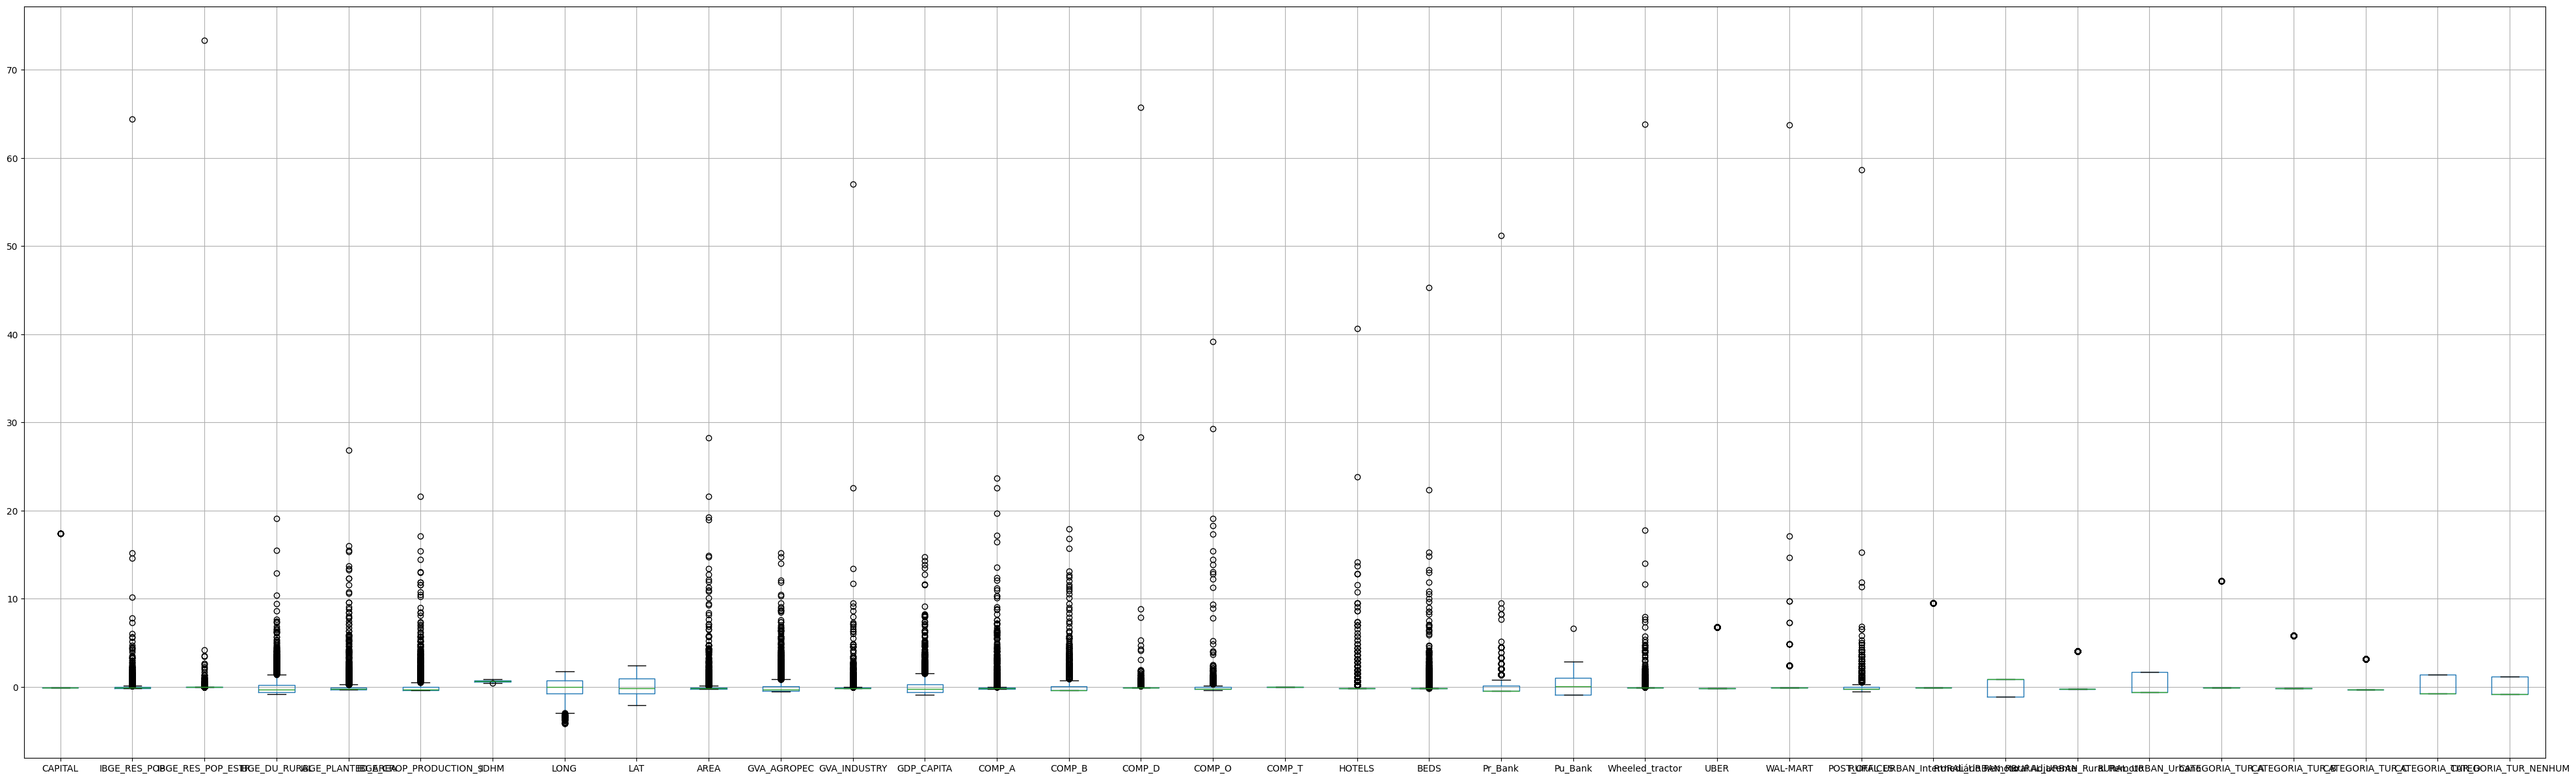

In [470]:
# Boxplot
fig = plt.figure(figsize=(50, 15))
df.boxplot()

## Outliers

In [471]:
df.columns

Index(['CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_ESTR', 'IBGE_DU_RURAL',
       'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 'IDHM', 'LONG', 'LAT',
       'AREA', 'GVA_AGROPEC', 'GVA_INDUSTRY', 'GDP_CAPITA', 'COMP_A', 'COMP_B',
       'COMP_D', 'COMP_O', 'COMP_T', 'HOTELS', 'BEDS', 'Pr_Bank', 'Pu_Bank',
       'Wheeled_tractor', 'UBER', 'WAL-MART', 'POST_OFFICES',
       'RURAL_URBAN_Intermediário Remoto', 'RURAL_URBAN_Rural Adjacente',
       'RURAL_URBAN_Rural Remoto', 'RURAL_URBAN_Urbano', 'CATEGORIA_TUR_A',
       'CATEGORIA_TUR_B', 'CATEGORIA_TUR_C', 'CATEGORIA_TUR_D',
       'CATEGORIA_TUR_NENHUM'],
      dtype='object')

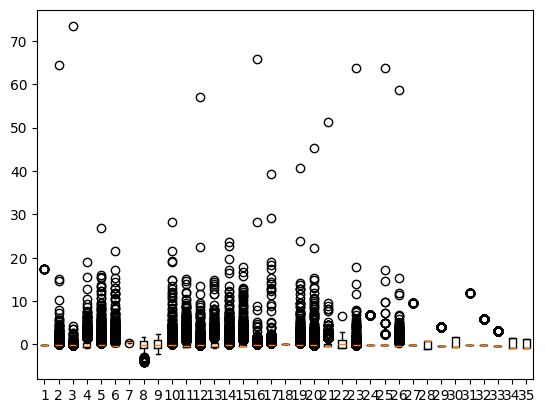

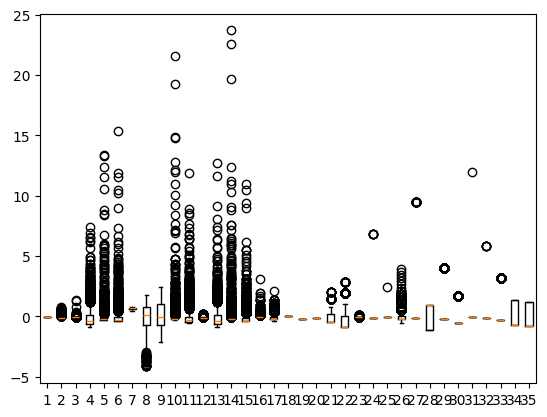

In [472]:
plt.boxplot(df)
plt.show()

# Remove outliers
columns_to_remove_outlier = ['IBGE_RES_POP', 'GVA_INDUSTRY', 'Pr_Bank', 'Pu_Bank', 'Wheeled_tractor', 'HOTELS']

limit_coef = 10

for column in columns_to_remove_outlier:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lLim = q1 - limit_coef * iqr
    hLim = q3 + limit_coef * iqr
    df = df[(df[column] >= lLim) & (df[column] <= hLim)]

plt.boxplot(df)
plt.show()

<Axes: >

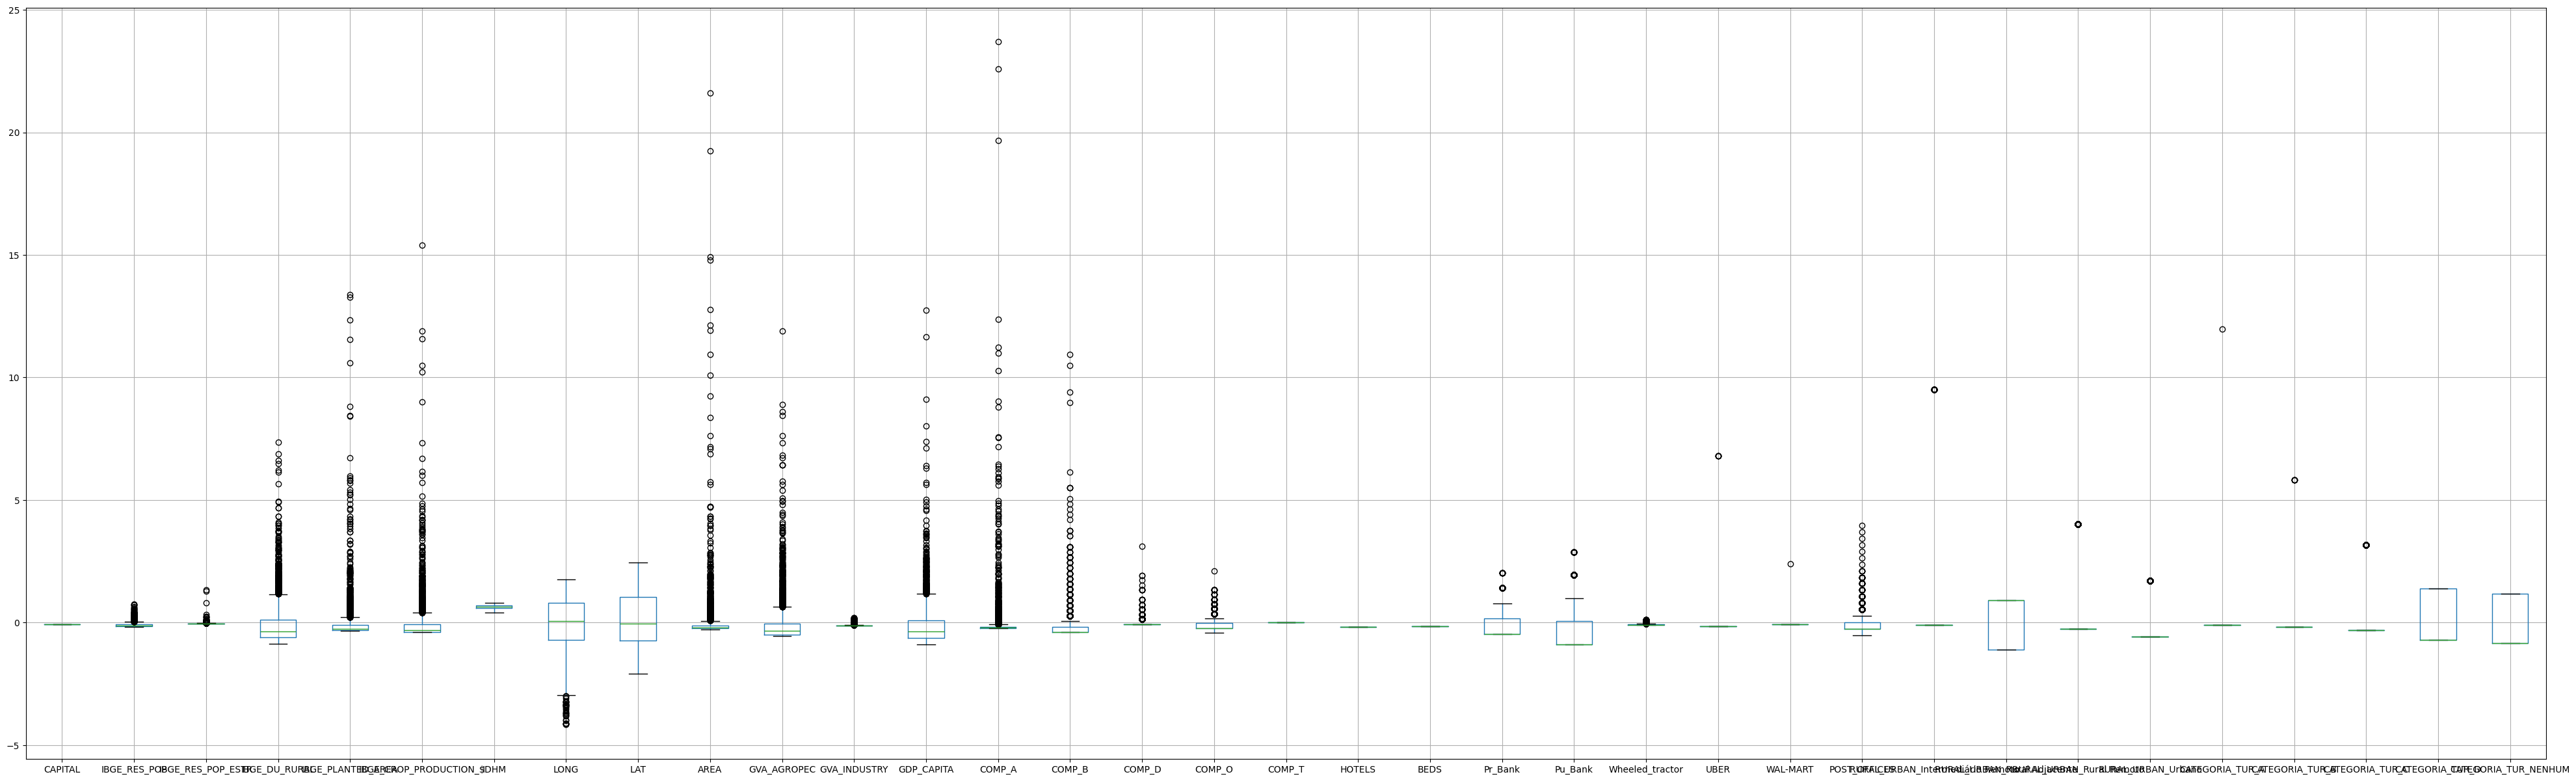

In [473]:
fig = plt.figure(figsize=(50, 15))
df.boxplot()

# Export Data

In [474]:
# Save to csv
df.to_csv('ProcessedData/br_cities_10.csv', index=False)